In [1]:
# Importar librerías
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asignar 'data' al documento CSV
data = pd.read_csv("covid19_tweets.csv")

data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [5]:
# Instrucción: "Verifica la cantidad de datos que tienes".
print("Renglones en total:")
print(len(data))

print("Columnas en total:")
print(len(data.columns))

Renglones en total:
74436
Columnas en total:
13


In [8]:
# Instrucción: "Las variables que contiene cada vector de datos".
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74436 entries, 0 to 74435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         74436 non-null  object
 1   user_location     59218 non-null  object
 2   user_description  70079 non-null  object
 3   user_created      74436 non-null  object
 4   user_followers    74436 non-null  int64 
 5   user_friends      74436 non-null  int64 
 6   user_favourites   74436 non-null  int64 
 7   user_verified     74436 non-null  bool  
 8   date              74436 non-null  object
 9   text              74436 non-null  object
 10  hashtags          53002 non-null  object
 11  source            74424 non-null  object
 12  is_retweet        74436 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 6.4+ MB


In [7]:
# Instrucción: "Identifica el tipo de variables".
data.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [9]:
# Instrucción: Basándose en la media, mediana y desviación
# estándar de cada variable, ¿Qué conclusiones puedes entregar de los datos?

data.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


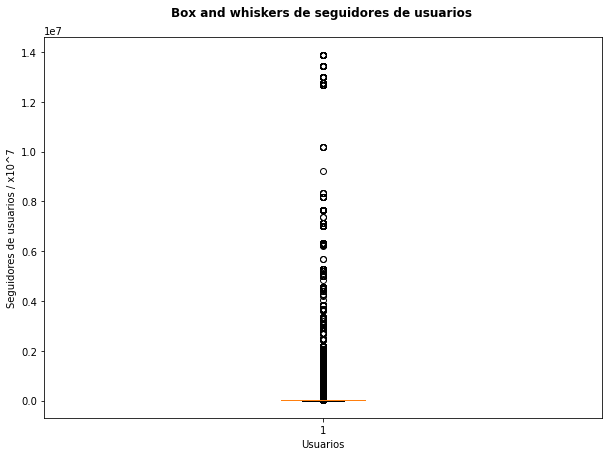

In [9]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['user_followers'])

plt.title('Box and whiskers de seguidores de usuarios \n', 
          fontweight ="bold")

plt.xlabel('Usuarios')
plt.ylabel('Seguidores de usuarios / x10^7')
plt.show()

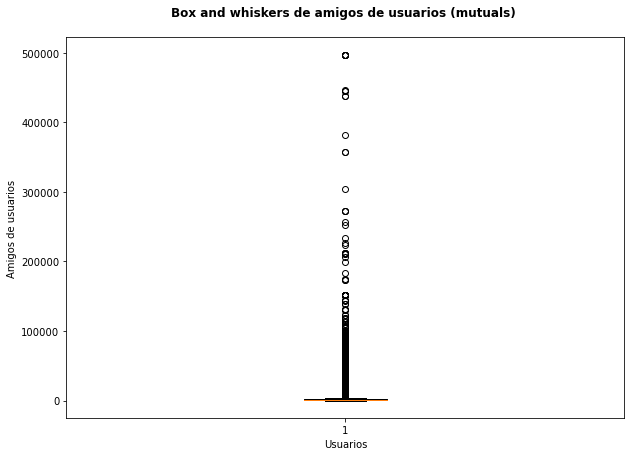

In [11]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['user_friends'])

plt.title('Box and whiskers de amigos de usuarios (mutuals) \n', 
          fontweight ="bold")

plt.xlabel('Usuarios')
plt.ylabel('Amigos de usuarios')
plt.show()

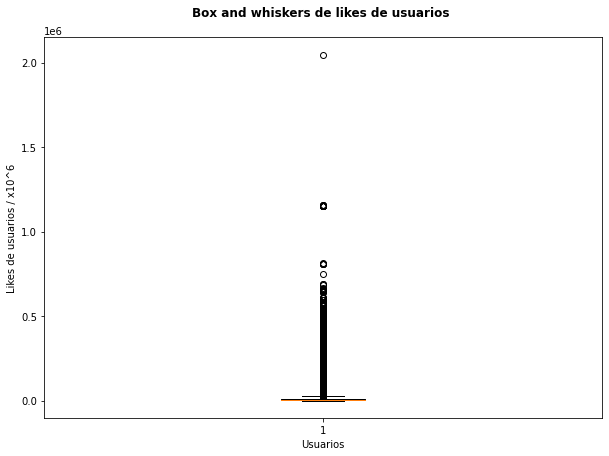

In [13]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['user_favourites'])

plt.title('Box and whiskers de likes de usuarios \n', 
          fontweight ="bold")

plt.xlabel('Usuarios')
plt.ylabel('Likes de usuarios / x10^6')
plt.show()

In [18]:
print("Correlación pearson:")
pearsoncorr = data.corr(method ='pearson')

pearsoncorr

Correlación pearson:


,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_followers,1.000000,-0.002722,-0.028724,0.322896,NaN
user_friends,-0.002722,1.000000,0.207825,0.013099,NaN
user_favourites,-0.028724,0.207825,1.000000,-0.060316,NaN
user_verified,0.322896,0.013099,-0.060316,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

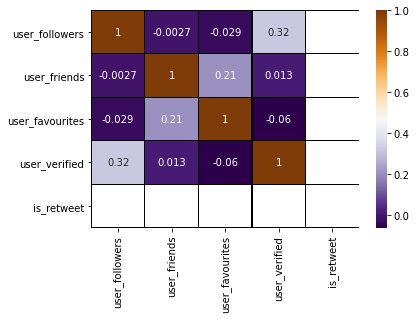

In [58]:
sns.heatmap(pearsoncorr,xticklabels = pearsoncorr.columns,
            yticklabels = pearsoncorr.columns,linecolor = 'black',
            linewidths=0.1,cmap = 'PuOr_r',annot=True)

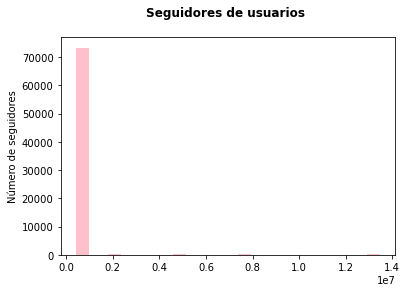

In [60]:
plt.hist(data['user_followers'],histtype ='bar', rwidth= 0.4, color='pink')
plt.title('Seguidores de usuarios \n', 
          fontweight ="bold")

plt.ylabel('Número de seguidores')
plt.show()